In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
mydata = pd.read_csv("CoderGirlDataset2.csv")

In [87]:
mydata.columns
mydata.head()
mydata.describe()
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Columns: 146 entries, QKEY to WEIGHT_W68
dtypes: float64(119), int64(11), object(16)
memory usage: 10.8+ MB


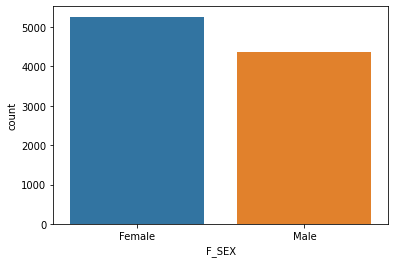

In [68]:
mydata['F_SEX'].replace(2, 'Female', inplace = True)
mydata['F_SEX'].replace(1, 'Male', inplace = True)



sex_plot = sns.countplot(x="F_SEX",data=mydata)




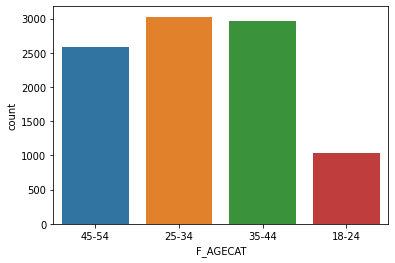

In [72]:
mydata['F_AGECAT'].replace(1, '18-24', inplace = True)
mydata['F_AGECAT'].replace(2, '25-34', inplace = True)
mydata['F_AGECAT'].replace(3, '35-44', inplace = True)
mydata['F_AGECAT'].replace(4, '45-54', inplace = True)
mydata['F_AGECAT'].replace(5, '55-64', inplace = True)
mydata['F_AGECAT'].replace(6, '65+', inplace = True)

age_plot = sns.countplot(x="F_AGECAT",data=mydata)

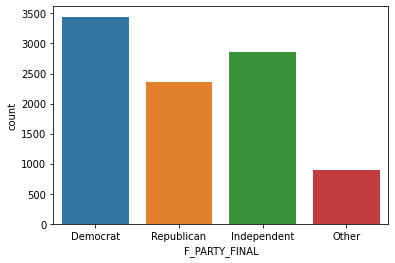

In [77]:
mydata['F_PARTY_FINAL'].replace(1, 'Republican', inplace = True)
mydata['F_PARTY_FINAL'].replace(2, 'Democrat', inplace = True)
mydata['F_PARTY_FINAL'].replace(3, 'Independent', inplace = True)
mydata['F_PARTY_FINAL'].replace(4, 'Other', inplace = True)

party_plot = sns.countplot(x="F_PARTY_FINAL",data=mydata)


In [35]:
mydata.columns[mydata.isnull().any()]
mydata.isnull().sum()



QKEY                    0
INTERVIEW_START_W68     0
INTERVIEW_END_W68       0
DEVICE_TYPE_W68         0
LANG_W68                0
                       ..
F_HISP_ORIGIN          15
F_YEARSINUS            46
F_PARTYSUMIDEO          0
FLAG_W68                0
WEIGHT_W68              0
Length: 146, dtype: int64

In [97]:
#Creating the Race Activisim scale variable
race_active = ((mydata["RACEACTIVISM_a_W68"]+ mydata["RACEACTIVISM_b_W68"] + mydata["RACEACTIVISM_c_W68"] + mydata["RACEACTIVISM_d_W68"] + mydata["RACEACTIVISM_e_W68"])/5)

mydata["M_RACEACTIVISM"] = race_active

news_info = ((mydata["NEWSHEARD_m_W68"]+ mydata["NEWSHEARD_n_W68"] + mydata["NEWSHEARD_o_W68"]
              + mydata["NEWSHEARD_g_W68"] + mydata["NEWSHEARD_i_W68"] + mydata["NEWSHEARD_j_W68"])/6)

mydata["M_NewsInfo"] = news_info

print(mydata)

              QKEY INTERVIEW_START_W68 INTERVIEW_END_W68  DEVICE_TYPE_W68  \
0     1.001970e+05       6/7/2020 1:05    6/7/2020 19:16                3   
1     1.002600e+05       6/7/2020 1:35     6/7/2020 1:58                3   
2     1.003140e+05      6/6/2020 13:29    6/6/2020 13:50                2   
3     1.003630e+05      6/5/2020 17:46    6/5/2020 17:57                2   
4     1.004460e+05      6/5/2020 18:37    6/5/2020 18:49                1   
...            ...                 ...               ...              ...   
9649  2.020000e+11      6/10/2020 0:39    6/10/2020 0:48                2   
9650  2.020000e+11      6/5/2020 18:19    6/5/2020 18:41                2   
9651  2.020000e+11      6/5/2020 17:39    6/5/2020 18:09                2   
9652  2.020000e+11      6/9/2020 15:47    6/9/2020 15:54                2   
9653  2.020000e+11      6/7/2020 22:49    6/7/2020 23:50                2   

      LANG_W68  FLOYDFOL_W68  FLOYDDISC_W68  FLOYDCOVER_W68  FLOYDATTN_W68 

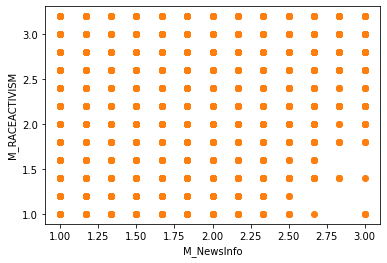

In [102]:
sns.scatterplot(data=mydata, x="M_NewsInfo", y="M_RACEACTIVISM")

#correlation --> No correlation between News information and Activism
mydata["M_NewsInfo"].corr(mydata["M_RACEACTIVISM"])

plot = plt.scatter(mydata["M_NewsInfo"], mydata["M_RACEACTIVISM"])

c:\users\christie\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\christie\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


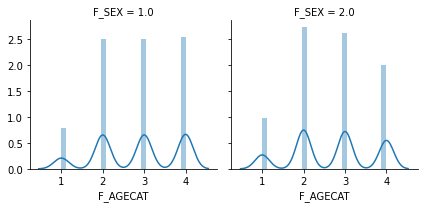

In [104]:
g = sns.FacetGrid(mydata, col = "F_SEX")
g.map(sns.distplot, "F_AGECAT", bins = 25)
plt.show()